# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  #para proyecciones en 3D
import ipywidgets as widgets
from IPython.display import display

# Cargar DataFrame

In [4]:
file = '../heart.csv'
df = pd.read_csv(file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Dividir dataset

In [6]:
X = df.drop("target", 1)
y= df["target"]
data = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_centrado = X[data]-X[data].mean(axis=0)

In [7]:
def varianza(var1, var2=None): #si recibe una variable calcula la varianza, si recibe 2 variables calcula la covarianza entre dichas variables
    if var2 is None:
        var2 = var1
    assert var1.shape == var2.shape  #devuelve booleano, si es true continua, si es false para el programa y arroja un error
    var1_mean = var1.mean()
    var2_mean = var2.mean()
    return np.sum((var1 - var1_mean) * (var2 - var2_mean)) / (var1.shape[0] - 1)

In [8]:
import numpy as np
cov_mat = np.cov(m=X_centrado.T)
cov_mat

array([[ 8.24845584e+01, -4.16661203e-01, -6.43498787e-01,
         4.44959019e+01,  1.00585076e+02,  3.92433283e-01,
        -5.55012786e-01, -8.29033178e+01,  4.13022097e-01,
         2.21458265e+00, -9.44790506e-01,  2.56635630e+00,
         3.78139138e-01],
       [-4.16661203e-01,  2.17166087e-01, -2.37361484e-02,
        -4.63969576e-01, -4.78030949e+00,  7.47491968e-03,
        -1.42613599e-02, -4.69870828e-01,  3.10143597e-02,
         5.19933119e-02, -8.81909383e-03,  5.63569602e-02,
         5.99304964e-02],
       [-6.43498787e-01, -2.37361484e-02,  1.06513234e+00,
         8.61713986e-01, -4.11377396e+00,  3.47190348e-02,
         2.41077088e-02,  6.99161804e+00, -1.91167792e-01,
        -1.78821061e-01,  7.61370839e-02, -1.91080366e-01,
        -1.02200949e-01],
       [ 4.44959019e+01, -4.63969576e-01,  8.61713986e-01,
         3.07586453e+02,  1.11967215e+02,  1.10904203e+00,
        -1.05232444e+00, -1.87591305e+01,  5.57111009e-01,
         3.93448626e+00, -1.31283195e

In [9]:
val_propios, vec_propios = np.linalg.eig(cov_mat)
print('Vectores propios: \n', vec_propios)
print('\nValores propios: \n', val_propios)

Vectores propios: 
 [[ 3.94611190e-02  1.82186255e-01 -1.25504851e-01 -9.74045897e-01
  -9.42717280e-03 -3.57395672e-03 -2.35709774e-02 -4.13752558e-03
   3.39271415e-03 -1.17999192e-03 -3.69770418e-04  6.83160351e-03
  -2.15313686e-04]
 [-1.78278639e-03  7.93727347e-04  1.06523049e-03  4.63454359e-03
   7.83114718e-02  2.81628747e-02  4.56421467e-02 -3.05438663e-01
   9.06424879e-02  2.18543751e-01  4.36806459e-01  7.73979050e-01
  -2.27707877e-01]
 [-1.53716667e-03 -1.25419057e-02 -6.16323248e-03 -9.26243002e-03
  -3.33646266e-01 -7.00831283e-01  5.97896304e-01 -1.27720409e-01
   6.29721136e-02  2.68592119e-02 -1.32559224e-01  3.42705015e-02
   2.53547739e-03]
 [ 4.75880705e-02  1.03810033e-01 -9.82278058e-01  1.48034489e-01
  -9.78973319e-03  7.57948749e-03 -1.79648282e-03  2.21211941e-04
   2.71386118e-03 -2.39693971e-03  2.12261010e-03  4.60794808e-04
  -2.61311763e-04]
 [ 9.98053283e-01 -1.94250905e-02  5.08647357e-02  3.02510768e-02
  -1.34405380e-03 -1.32801334e-03  1.06799220e

In [10]:
orden_componentes = np.argsort(val_propios)[::-1]
val_propios_ordenados = val_propios[orden_componentes]
vec_propios_ordenados = vec_propios[orden_componentes]
print('Vectores propios(ordenados): \n', vec_propios_ordenados)
print('\nValores propios(ordenados): \n', val_propios_ordenados)


Vectores propios(ordenados): 
 [[ 3.94611190e-02  1.82186255e-01 -1.25504851e-01 -9.74045897e-01
  -9.42717280e-03 -3.57395672e-03 -2.35709774e-02 -4.13752558e-03
   3.39271415e-03 -1.17999192e-03 -3.69770418e-04  6.83160351e-03
  -2.15313686e-04]
 [-1.78278639e-03  7.93727347e-04  1.06523049e-03  4.63454359e-03
   7.83114718e-02  2.81628747e-02  4.56421467e-02 -3.05438663e-01
   9.06424879e-02  2.18543751e-01  4.36806459e-01  7.73979050e-01
  -2.27707877e-01]
 [-1.53716667e-03 -1.25419057e-02 -6.16323248e-03 -9.26243002e-03
  -3.33646266e-01 -7.00831283e-01  5.97896304e-01 -1.27720409e-01
   6.29721136e-02  2.68592119e-02 -1.32559224e-01  3.42705015e-02
   2.53547739e-03]
 [ 4.75880705e-02  1.03810033e-01 -9.82278058e-01  1.48034489e-01
  -9.78973319e-03  7.57948749e-03 -1.79648282e-03  2.21211941e-04
   2.71386118e-03 -2.39693971e-03  2.12261010e-03  4.60794808e-04
  -2.61311763e-04]
 [ 9.98053283e-01 -1.94250905e-02  5.08647357e-02  3.02510768e-02
  -1.34405380e-03 -1.32801334e-03  

# PCA

In [11]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_centrado)

In [12]:
pca.components_

array([[ 3.94611190e-02, -1.78278639e-03, -1.53716667e-03,
         4.75880705e-02,  9.98053283e-01,  1.16389852e-04,
        -1.55243101e-03, -7.35838010e-03,  6.31483108e-04,
         1.32988432e-03, -9.99857233e-05,  1.46773705e-03,
         1.18215354e-03],
       [ 1.82186255e-01,  7.93727347e-04, -1.25419057e-02,
         1.03810033e-01, -1.94250905e-02,  4.61971663e-04,
        -1.20213285e-03, -9.77188942e-01,  7.54817512e-03,
         1.79407185e-02, -1.04271838e-02,  1.01095919e-02,
         2.59241726e-03]])

In [13]:
pca.explained_variance_ratio_

array([0.7475642 , 0.15037022])

<IPython.core.display.Javascript object>


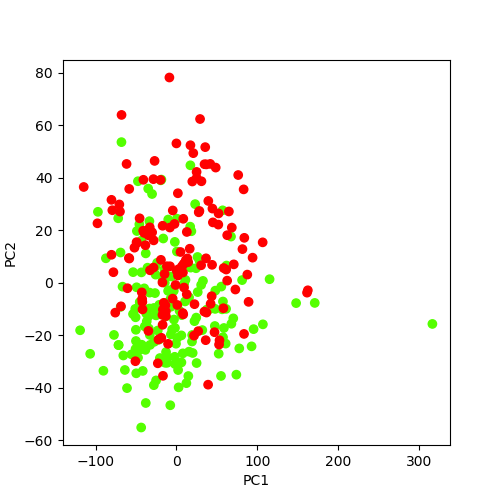

In [14]:
fig = plt.figure(figsize=(5,5))
plt.xlabel("PC1", size = 10)
plt.ylabel("PC2", size = 10)
plt.scatter(X_pca[:,0], X_pca[:,1],c=y, cmap = plt.cm.prism)
plt.show()
